In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

#from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances

In [2]:
# L2
# Euclidean distance
def euclid(a,b):
    #return math.sqrt( ((a[0]-b[0])**2)+((a[1]-b[1])**2) )
    return math.sqrt( ((a[0]-b[0])**2) + ((a[1] - b[1])**2) )
# L1
# Manhatten distance
def manhatten(p,q):
    return (abs(p[0] - q[0]) + abs(p[1] - q[1]))

def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

In [3]:
############### Random DATA GENERATION ##################
def generate_data(numvals):
    # randomly generate 2D training data
    data = np.random.normal(0.0, 1.0, size=(numvals, 2))
    #data = pd.DataFrame(np.random.randint(0,1.0,size=(numvals, 2)))
    tmp = np.random.normal(5.0, 1.0, size=(numvals, 2))
    #tmp = pd.DataFrame(np.random.randint(1.0,5.0,size=(numvals, 2)))
    data = np.concatenate((data, tmp), axis=0)
    data = pd.DataFrame(data=data)
    #data = pd.concat([data,tmp], axis=0)
    return data.values

In [4]:
# Generating data
data = generate_data(50)

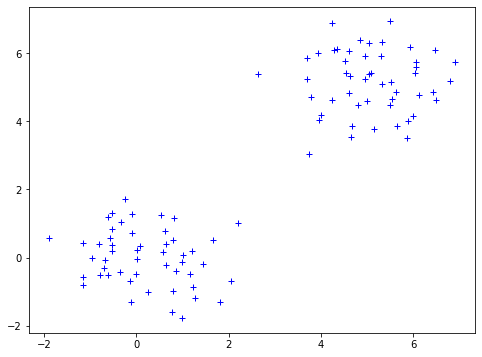

In [5]:
# Plot of the data
plt.figure(figsize=(8,6))
plt.plot(data[:,0],data[:,1],'b+')
plt.show()

In [6]:
# k = Anzahl der Cluster die Entstehen sollen
def kmeans(data, dist, k):
    # Init of the k clusters
    # Array of k centroids, first 2 values of the array represent the X and Y position of the Clusters
    # The following 10 positions are the distances to the other points
    centroids = np.zeros((k,2 + len(data)))
    # Labels which Cluster the point belongs to
    cen_labels = np.zeros(len(data), dtype=int)
    # Random init of Centroid as one of the data points
    pos_taken = cen_labels.copy()
    for i in range(0,len(centroids)):
        #check if point is already a centroid
        while True:
            cen_pos = random.randint(0,len(data)-1)
            if cen_pos in pos_taken:
                continue
            else:
                #place into the check array
                pos_taken[i] = cen_pos
                # first two elements are the X any Y position
                centroids[i][:2] = data[cen_pos]
                break
    # Main Loop
    # Calculating distance for cluster to the data points
    # Allocat a point with the shortest distance to a cluster in a labeled array
    # Recompute the new X and Y positions of the cluster based on the nearest points
    iterations = 0
    changes = []
    while True:
        # If there is no change in pos of the centroids stop here
        # TODO calculate difference of new centroids and stop if change is to small
        if changes is not None and len(changes) >= 4:
            xdif = abs(changes[-2] - changes[-4])
            ydif = abs(changes[-1] - changes[-3])
            #print('ARRAY: ' + str(changes[-4:]))
            #print('Changes: ' + str(xdif) + ' | ' + str(ydif))
            #print('Before: ' + str(ydif[]))
            if ydif < 0.5 and xdif < 0.5:
                print('Ending no big difference in the changes of X and Y')
                break
        # Stop after 10 itterations
        if iterations == 10:
            break

        # Calculate distance between centroids and datapoints
        for i in range(0,len(centroids)):
            # calculate distance and save it in an array            
            for j in range(2, len(data) +2):
                centroids[i][j] = euclid(centroids[i][:2], data[j-2])
        
        # Assign datapoints to the closest centroid
        # safing the k of shortest distance in a value and assigning it to the array 
        for i in range(2, len(data)+2):
            # cluster number
            klow = -1
            # starting variable to compare
            lval = centroids[0][i]
            # looping through the first collumn of the centroids and comparing them
            # with the ones from the other collumns
            for j in range(1,k):
                # if there is only one cluster, dont search
                if k == 1:
                    break
                # replace the k (cluster classification) if smaller distance is found
                if centroids[j][i] <= lval:
                    klow = j
                    lval = centroids[j][i].copy()
            # if there was no change set the first cluster as the shortest distance
            if klow == -1:
                klow = 0
            # k of the lowest var gets into the label array      
            cen_labels[i-2] = klow

        print('Iter: ' + str(iterations) +' |LABELS:'  + str(cen_labels))

        # Recompute Centroids
        # for each cluster calculate the mean of the assigned points
        # mean of X and Y is the new location of the recomputed cluster 
        for i in range(0,k):
            xvals = centroids[i][0];
            yvals = centroids[i][1];
            c = 1
            for j in range(len(cen_labels)):
                if cen_labels[j] == i:
                    xvals += data[j][0]
                    yvals += data[j][1]
                    c += 1
            xmean = xvals / c  # numpy mean works too 
            ymean = yvals / c
            #print('Before: ' + str(centroids[i][:2]))
            centroids[i][0] = xmean
            centroids[i][1] = ymean   
            #print('After: ' + str(centroids[i][:2]))
            # Adding new pos to the change array
            changes.append(xmean)
            changes.append(ymean)
        iterations += 1

    return centroids,cen_labels
    

In [7]:
############## MAIN #####################
dist = 0
k = 3

centroids,cenlabels = kmeans(data,dist,k)
#print('Centroids with distances: \n' + str(centroids))

Iter: 0 |LABELS:[1 0 0 1 2 0 1 1 2 0 1 2 0 2 2 2 1 1 2 1 2 2 0 1 0 1 1 2 1 2 2 1 2 2 2 2 1
 2 2 1 1 2 2 1 2 1 2 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Iter: 1 |LABELS:[2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 1 1 1 2 1 2 2 2 1 2 1 1 2 1 2 2 1 2 2 2 2 1
 2 2 1 1 2 2 1 2 1 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Iter: 2 |LABELS:[1 2 2 2 2 2 1 1 1 2 2 2 2 2 2 1 1 1 2 1 2 2 2 1 2 1 1 2 1 2 2 1 2 2 2 2 1
 2 2 1 1 2 2 1 2 1 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Iter: 3 |LABELS:[1 2 2 2 2 2 1 1 1 2 2 2 2 2 2 1 1 1 2 1 2 2 2 1 2 1 1 2 1 2 2 1 2 2 2 2 1
 2 2 1 1 2 2 1 2 1 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Iter: 4 |LABELS:[1 2 2 2 2 2 1 1 1 2 2 2 2 2 2 1 1 1 2 1 2 2 2 1 2 1 1 2 1 2 2 1 2 2 2 2 1
 2 2 1 1 2 2 1 2 1 1 1 2 1 0 

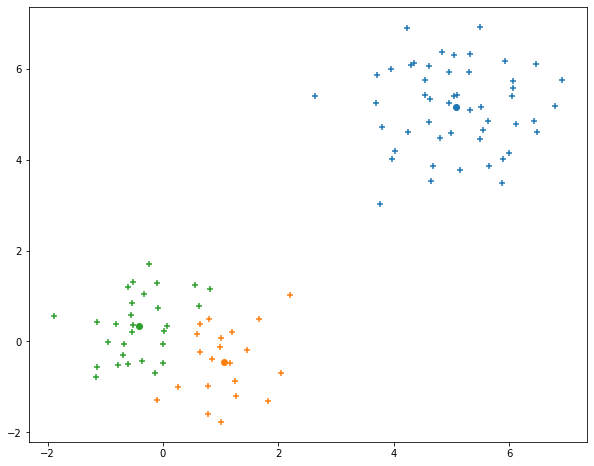

In [8]:
# plot the centroids and their nearest points
plt.figure(figsize=(10,8))
# Plot centroids in different colors
cmap = get_cmap(len(cenlabels))
for i in range(0,k):
    color = cmap(i)
    # Plot of the centroids
    plt.plot(centroids[i,0],centroids[i,1],'o')
    # Data points that belong to the cluster
    points = np.zeros((0,2),dtype=float)
    for j in range(0,len(cenlabels)):
        if cenlabels[j] == i:
            # Adding to the numpy points array
            points = np.append(points,[[data[j,0],data[j,1]]],axis=0)
    plt.scatter(points[:,0],points[:,1], marker='+',cmap='color')
plt.show()